# **Name : Ghori Zeel JivrajbhaI**

# **Student ID : 202201287**

# **Course : Applied Forecasting Methods**

# **LAB 01**

# **EXPLORATORY DATA ANALYSIS**

In [1]:
import pandas as pd

## Step 1 : Load the data in google colab (housing.csv dataset)

In [2]:
dataset = pd.read_csv("/content/housing.csv")

## Step 2 : Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [5]:
dataset.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [6]:
dataset.shape

(489, 4)

In [7]:
dataset.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


## Step 3 : Check for the null values and filling the null values.

In [8]:
dataset.isnull().sum()

,0
RM,0
LSTAT,0
PTRATIO,0
MEDV,0


**OBSERVATIONS :**


Since there are no NULL values in any column, we need not to compute them.


Ways to handle NULL values in EDA:
1.   Mean/Median/Mode: Use mean for symmetric numerical data, median for skewed, and mode for categorical data to retain central tendency.
2.   Forward/Backward Fill: Use in time-series data to propagate trends.
Interpolation: Estimate missing values based on logical trends, especially in numerical data.
3.    Drop Rows/Columns: Apply when missing values are extensive or non-critical.
4.    Predictive Modeling: Use for critical features with complex patterns using machine learning.















## Step 4 : Detect the outliers using box plot and remove them

### Method 1 : IQR method for removal of outliers

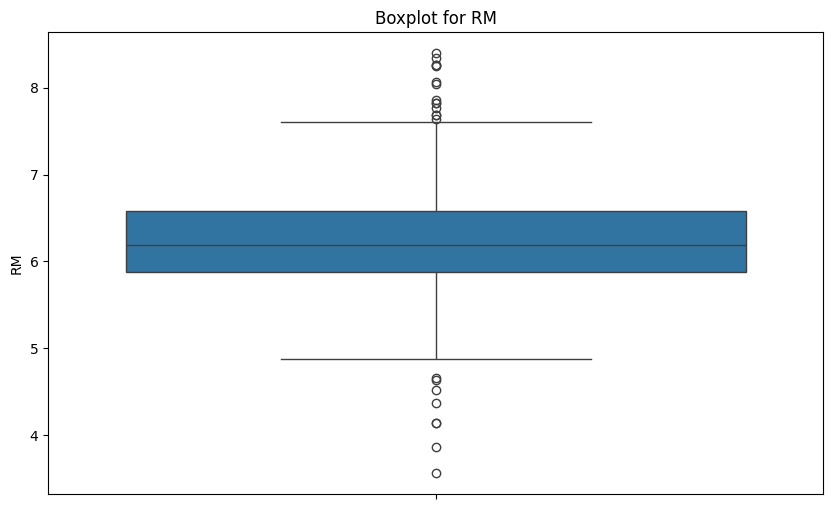

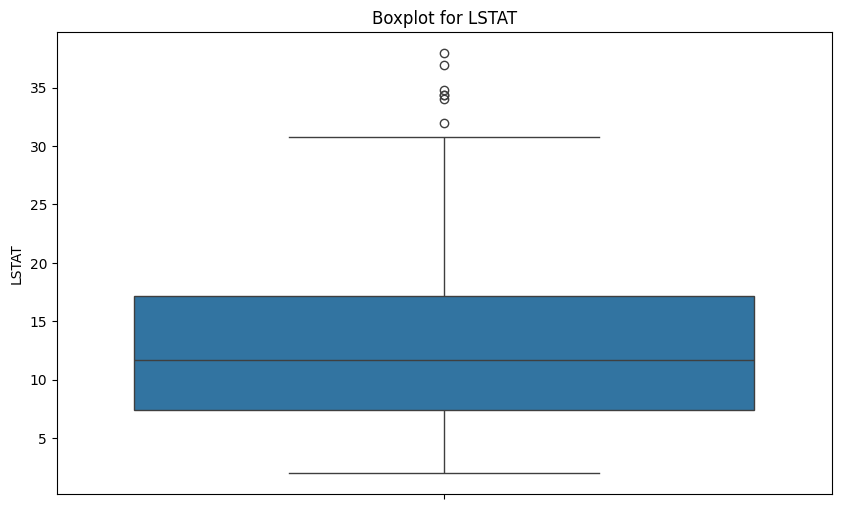

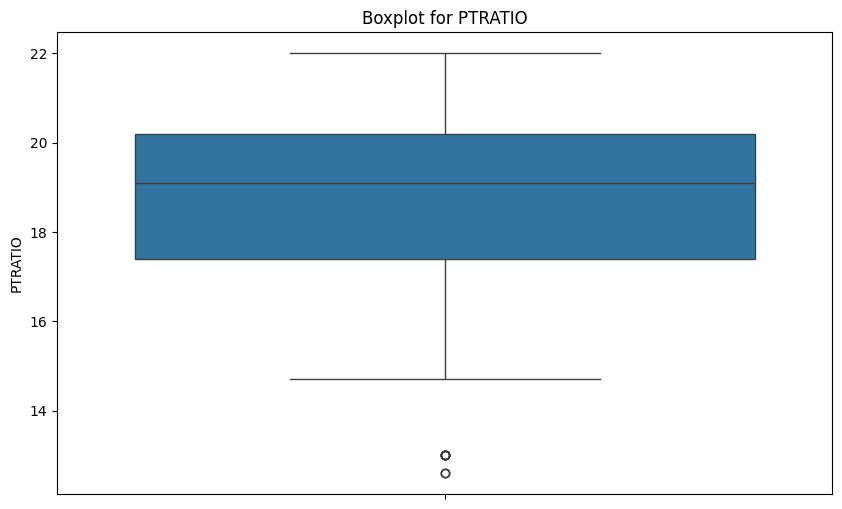

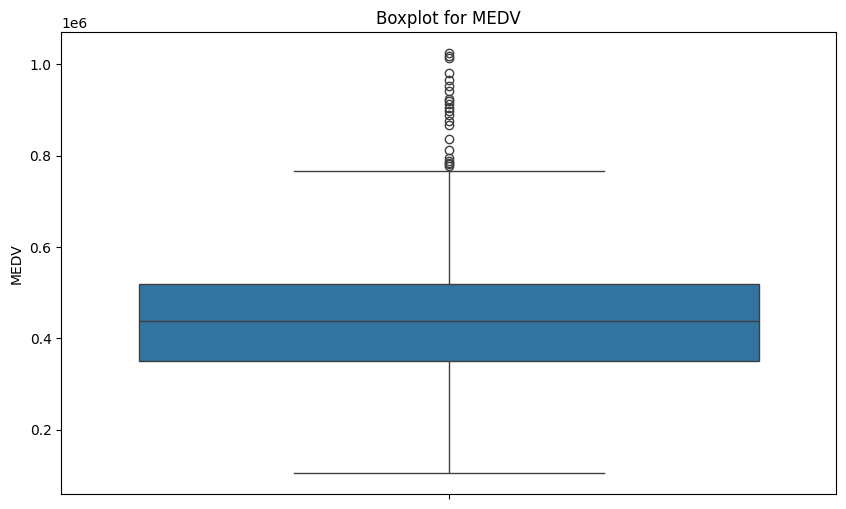

In [9]:
# Box Plot before removing outliers
for col in dataset.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=dataset[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [10]:
# Remove outliers based on IQR
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print("IQR of all columns")
print(IQR)

# Filtering outliers
dataset_IQR_removal = dataset[~((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

IQR of all columns
RM              0.695
LSTAT           9.750
PTRATIO         2.800
MEDV       168000.000
dtype: float64


In [11]:
print("shape of dataset after removal of outliers")
dataset_IQR_removal.shape

shape of dataset after removal of outliers


(444, 4)

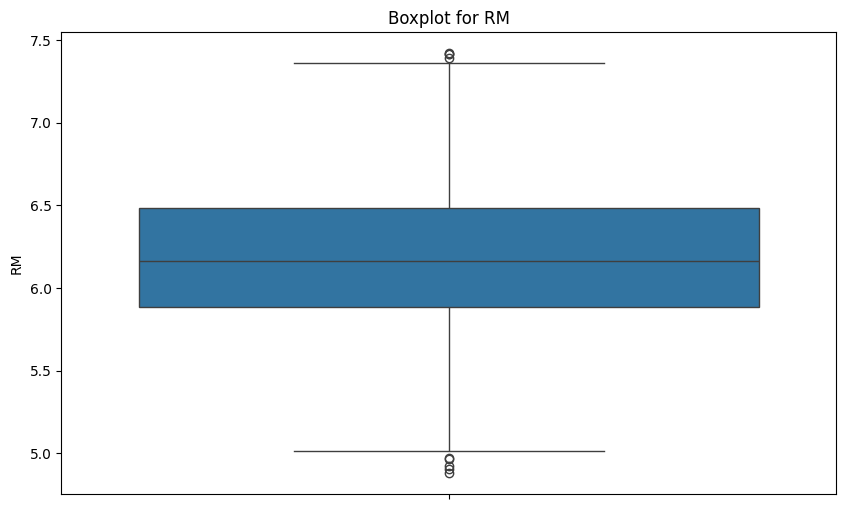

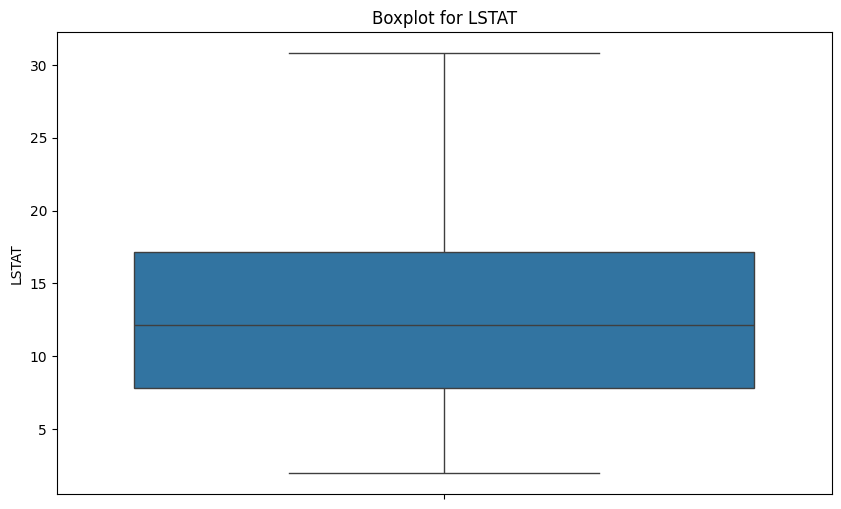

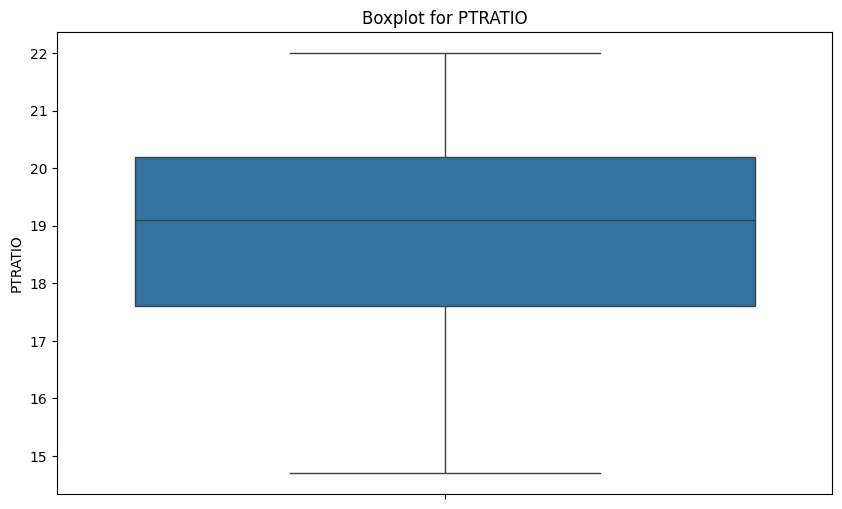

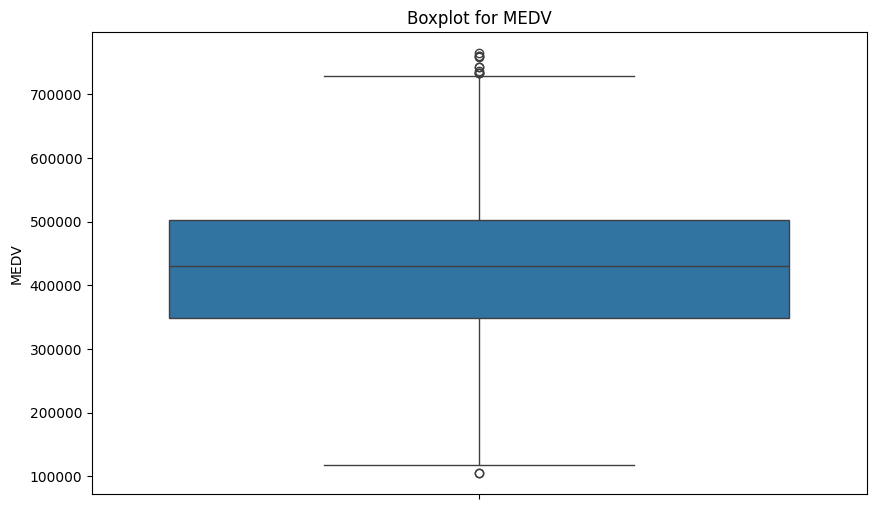

In [12]:
# Box plot after removing outliers
for col in dataset_IQR_removal.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=dataset_IQR_removal[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

Removing the outliers second time to make dataset proper.

In [13]:
# Remove outliers based on IQR second time
Q1 = dataset_IQR_removal.quantile(0.25)
Q3 = dataset_IQR_removal.quantile(0.75)
IQR = Q3 - Q1
print("IQR of all columns")
print(IQR)

# Filtering outliers
dataset_IQR_removal = dataset_IQR_removal[~((dataset_IQR_removal < (Q1 - 1.5 * IQR)) | (dataset_IQR_removal > (Q3 + 1.5 * IQR))).any(axis=1)]

IQR of all columns
RM              0.60125
LSTAT           9.36250
PTRATIO         2.60000
MEDV       153825.00000
dtype: float64


In [14]:
print("shape of dataset after removal of outliers second time")
dataset_IQR_removal.shape

shape of dataset after removal of outliers second time


(423, 4)

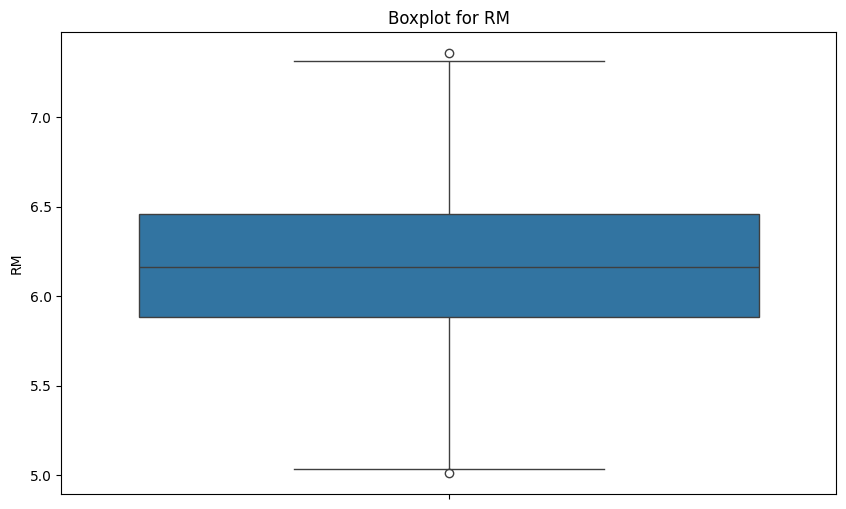

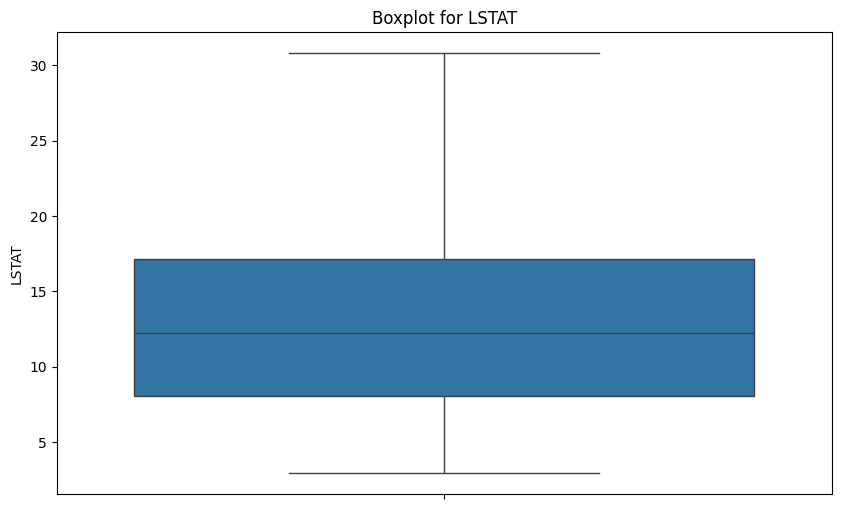

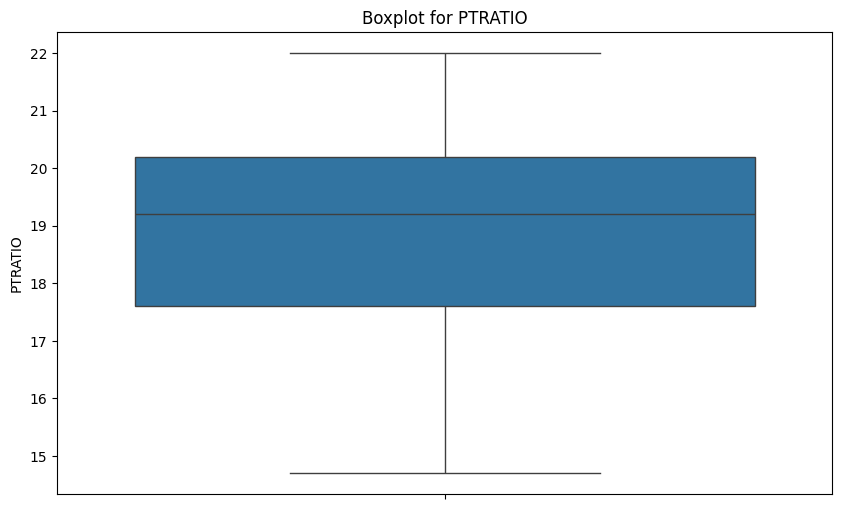

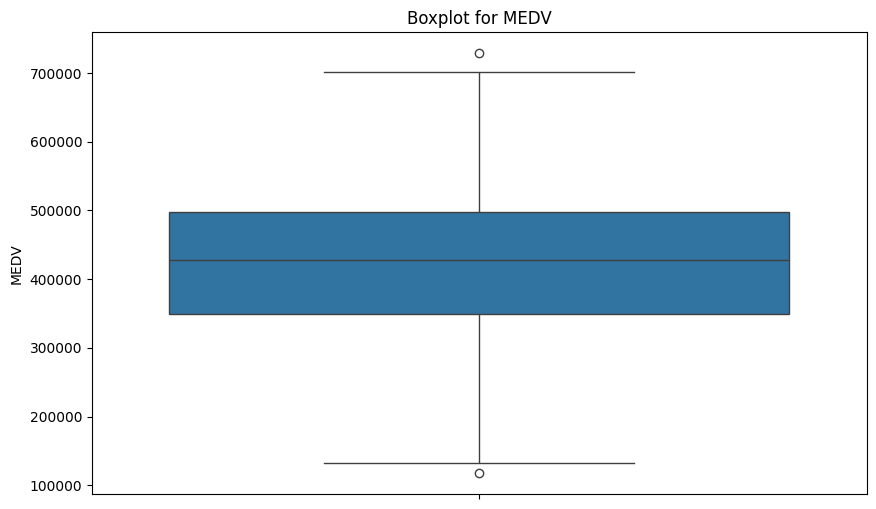

In [15]:
# Box Plot after removing the outliers second time
for col in dataset_IQR_removal.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=dataset_IQR_removal[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

### Method 2 : Mean and standard deviation method for removal of outliers
Outliers are points lying above and below (Mean - 3xStandard_deviation) and (Mean + 3xStandard_deviation)

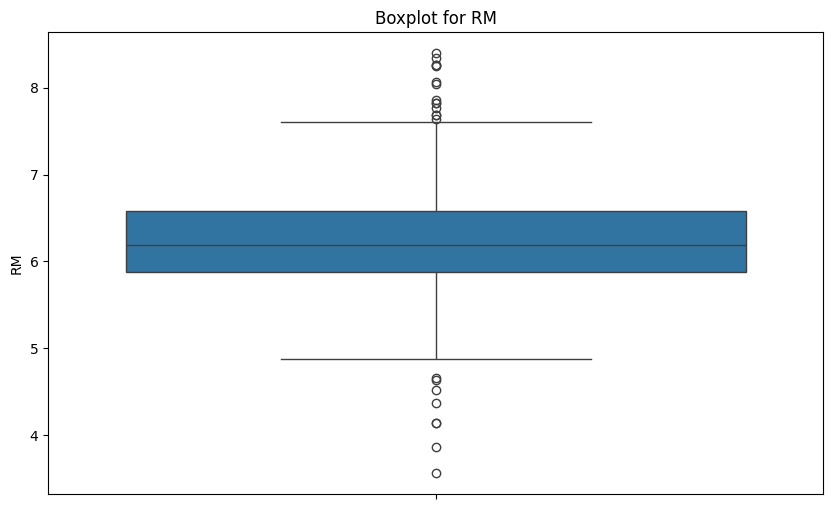

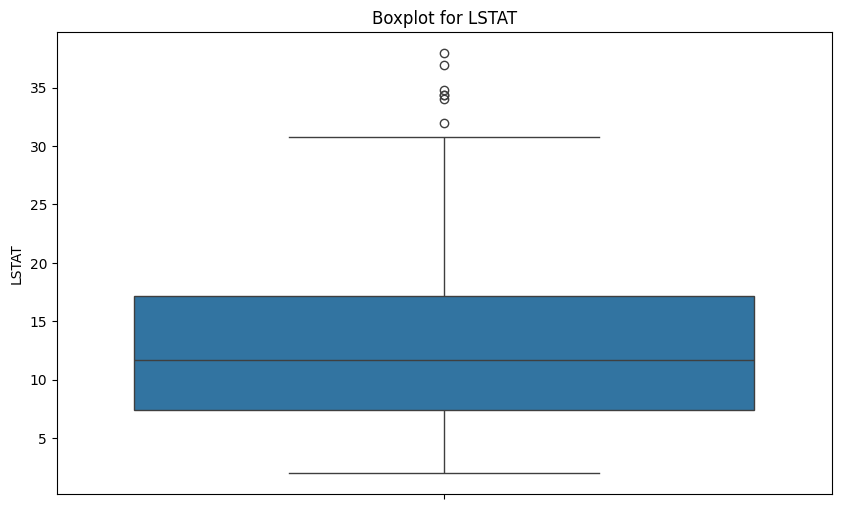

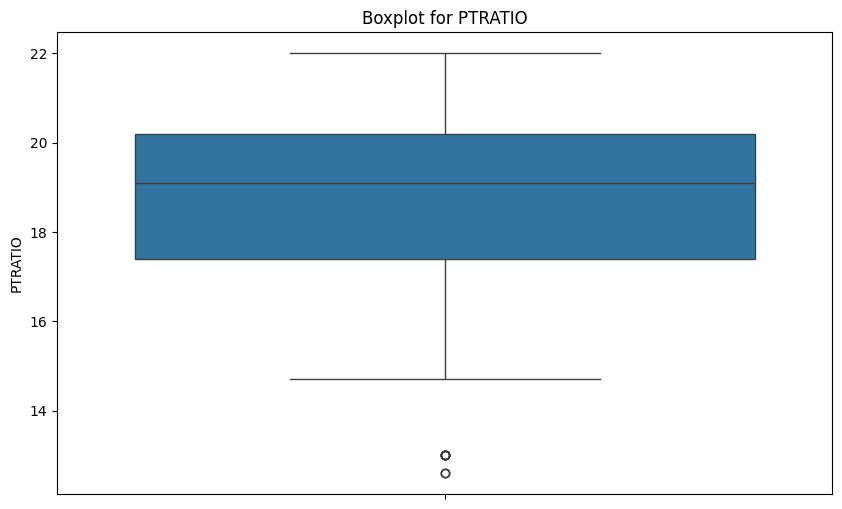

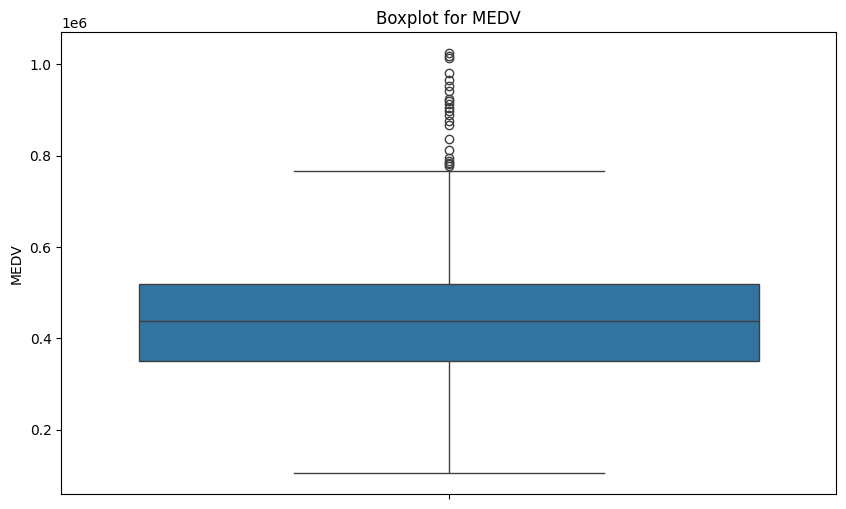

In [16]:
# Box Plot before removing outliers
for col in dataset.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=dataset[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [17]:
# Remove outliers based on mean and standard deviation
# Calculate the mean and standard deviation for each numerical column
mean = dataset.mean()
std_dev = dataset.std()

# Define threshold (e.g., 3 standard deviations)
threshold = 3

# Remove outliers
dataset_no_outliers = dataset[
    ~((dataset < (mean - threshold * std_dev)) | (dataset > (mean + threshold * std_dev))).any(axis=1)
]

print(f"Original dataset size: {dataset.shape}")
print(f"dataset size after removing outliers: {dataset_no_outliers.shape}")


Original dataset size: (489, 4)
dataset size after removing outliers: (472, 4)


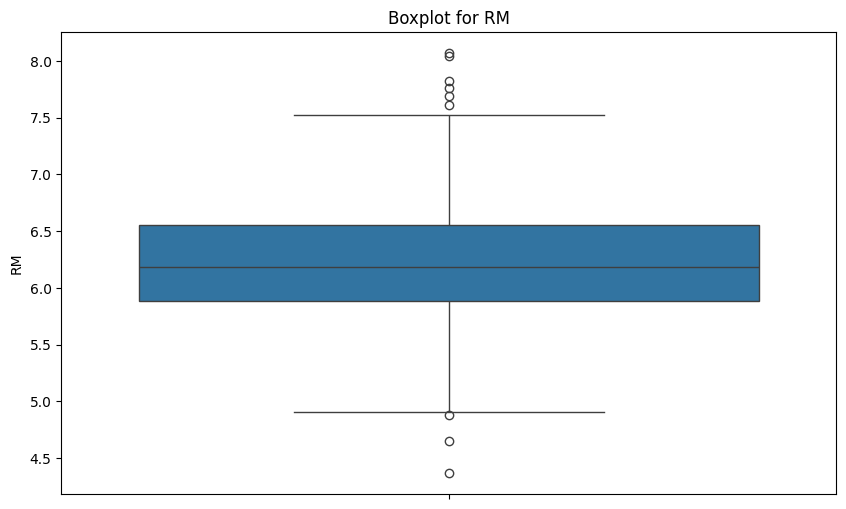

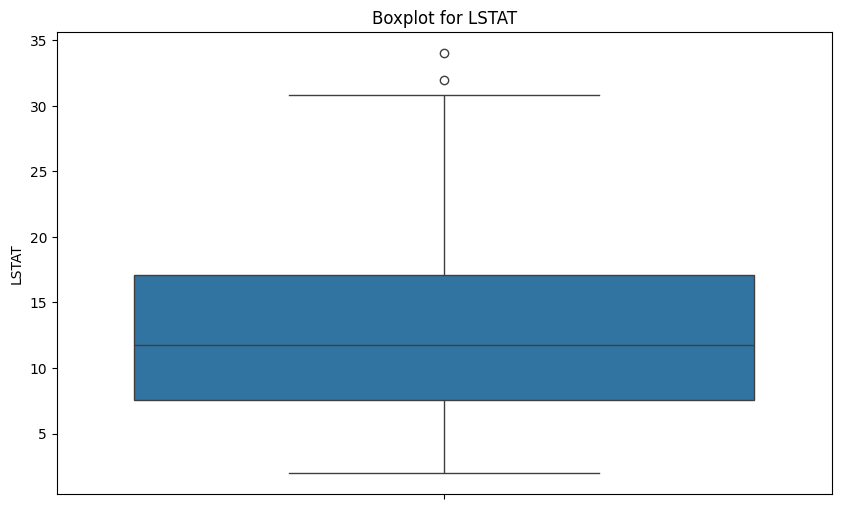

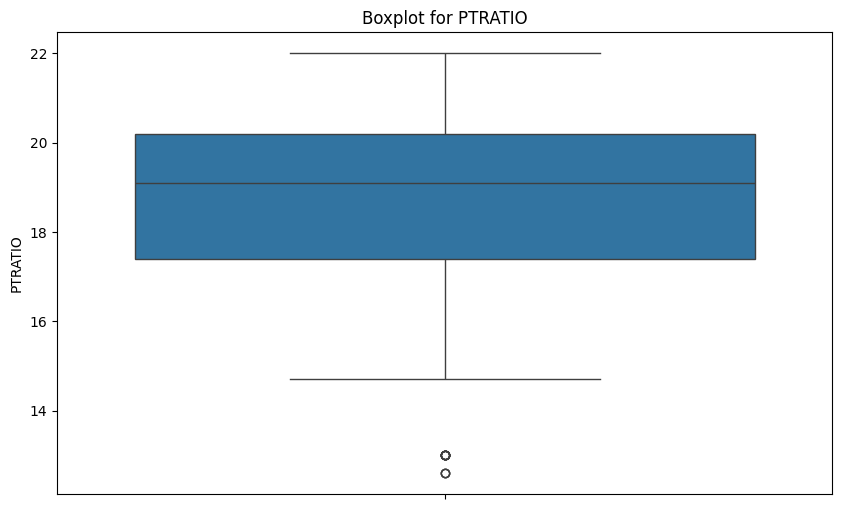

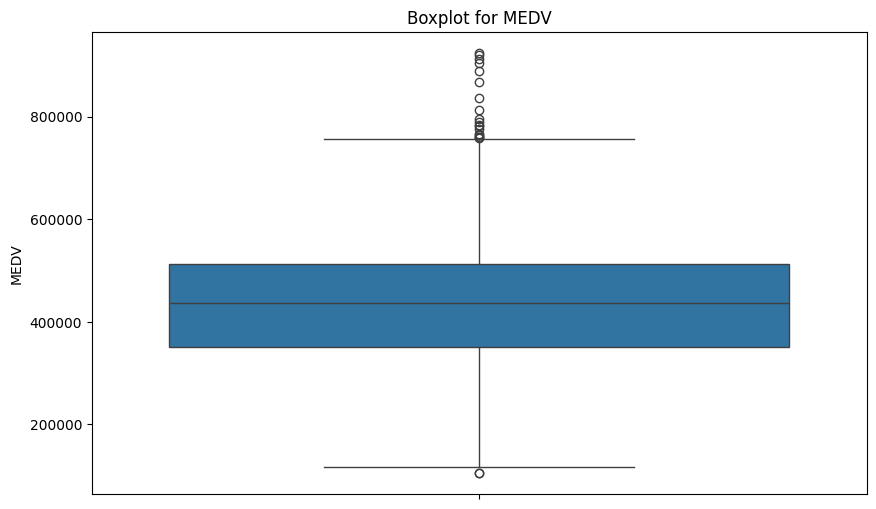

In [18]:
# Box Plot before removing outliers first time
for col in dataset_no_outliers.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=dataset_no_outliers[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [19]:
# Remove outliers based on mean and standard deviation second time
# Calculate the mean and standard deviation for each numerical column
mean = dataset_no_outliers.mean()
std_dev = dataset_no_outliers.std()

# Define threshold (e.g., 3 standard deviations)
threshold = 3

# Remove outliers
dataset_no_outliers = dataset_no_outliers[
    ~((dataset_no_outliers < (mean - threshold * std_dev)) | (dataset_no_outliers > (mean + threshold * std_dev))).any(axis=1)
]

print(f"dataset size after removing outliers second time: {dataset_no_outliers.shape}")


dataset size after removing outliers second time: (464, 4)


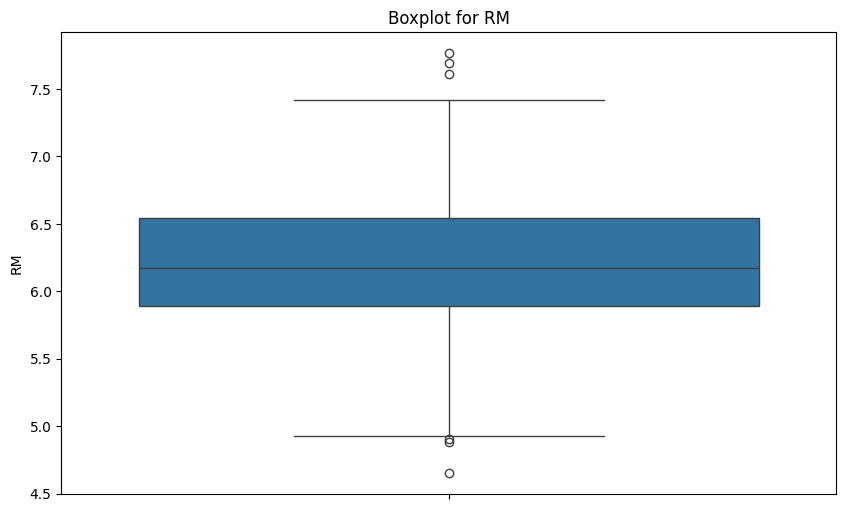

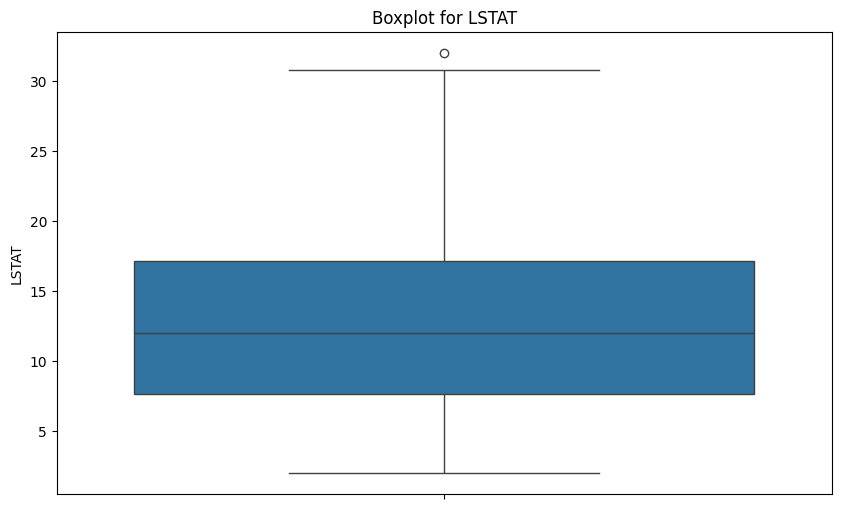

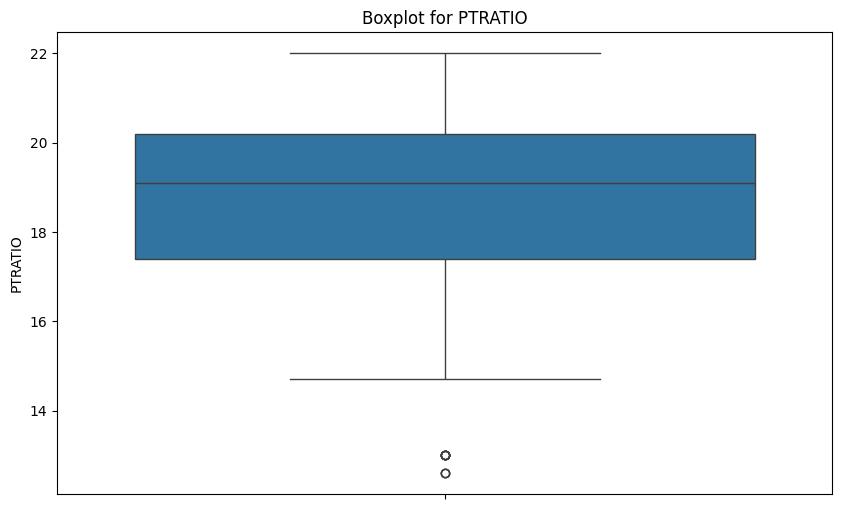

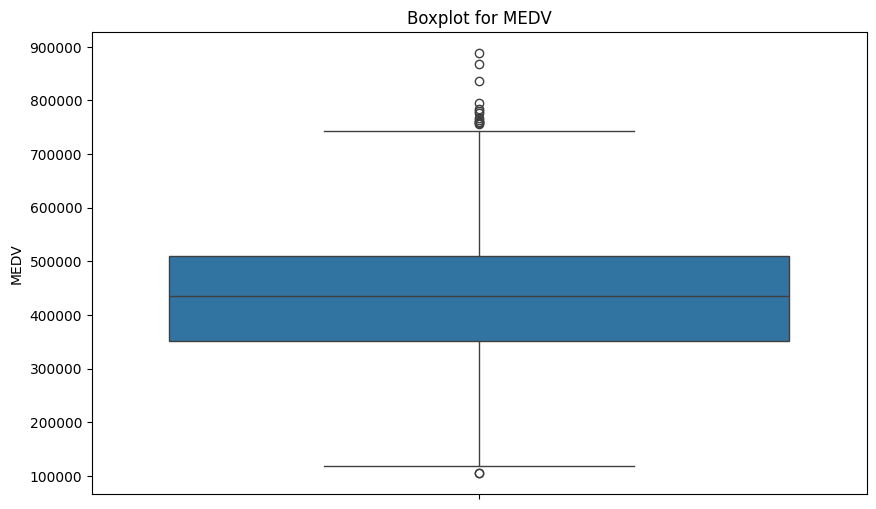

In [20]:
# Box Plot before removing outliers second time
for col in dataset_no_outliers.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=dataset_no_outliers[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

**OBSERVATION**

Since there is not much loss in data we can remove the outliers two times to make data perfect for analysis and prediction. As removing outliers make dataset perfect for model fitting and gives less error in prediction.

## Step 5 : Find the correlation of all other variables with the target MEDV using the scatter plot, and report the highly correlated variable with MEDV.

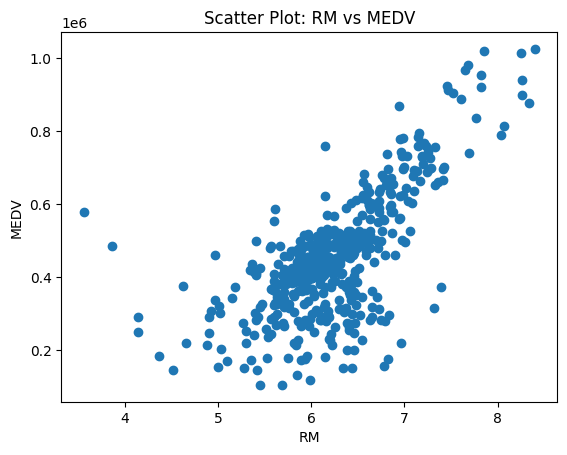

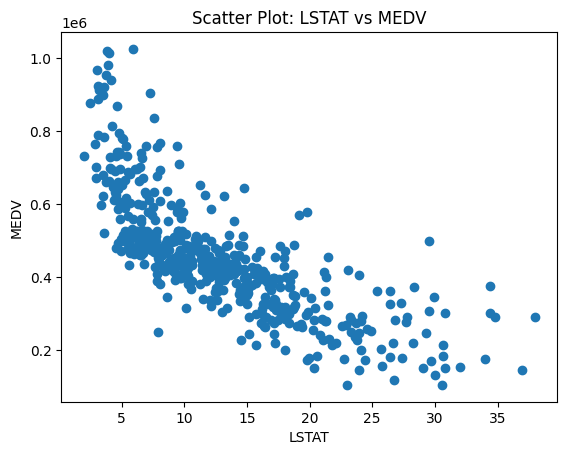

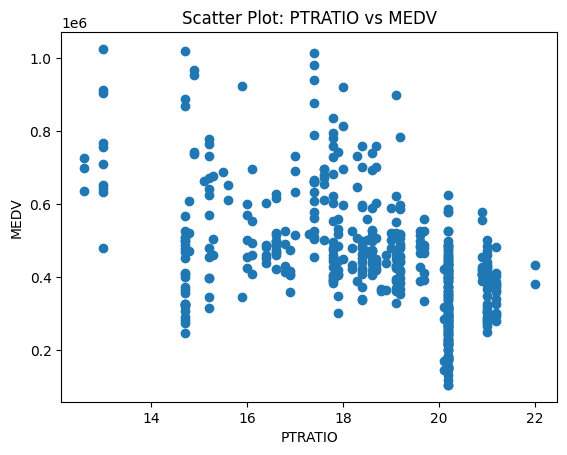

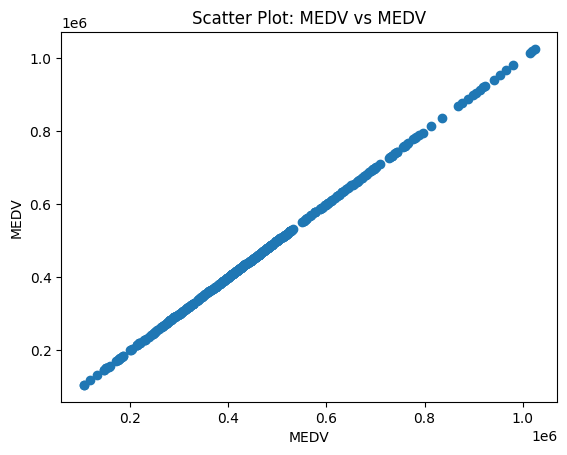

In [21]:
# Scatter plot for correlation
for col in dataset.columns:
    plt.scatter(dataset[col], dataset['MEDV'])
    plt.title(f"Scatter Plot: {col} vs MEDV")
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.show()

In [22]:
# Correlation calculation
correlation = dataset.corr()
print("correlation of each varable with every other varaibles")
print(correlation)

correlation of each varable with every other varaibles
               RM     LSTAT   PTRATIO      MEDV
RM       1.000000 -0.612033 -0.304559  0.697209
LSTAT   -0.612033  1.000000  0.360445 -0.760670
PTRATIO -0.304559  0.360445  1.000000 -0.519034
MEDV     0.697209 -0.760670 -0.519034  1.000000


In [23]:

print("correlation of MEDV with other variables in descending order")
print(correlation['MEDV'].sort_values(ascending=False))

correlation of MEDV with other variables in descending order
MEDV       1.000000
RM         0.697209
PTRATIO   -0.519034
LSTAT     -0.760670
Name: MEDV, dtype: float64


**OBSERVATIONS** :


1.   The column which is mostly correlated with MEDV column in RM with value of 0.697209. It is positively correlated with MEDV.
2.   Then after the column PTRATIO is negatively correlated with column MEDV with value of -0.519034.
3.   The least negatively correlated column is LSTAT with value of -0.760670.



# **REGRESSION**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import math

In [25]:
dataset_train = pd.read_csv("/content/train.csv")
dataset_test = pd.read_csv("/content/test.csv")

In [26]:
dataset_train.info()
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Income   10 non-null     float64
 1   Balance  10 non-null     float64
dtypes: float64(2)
memory usage: 292.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Income   20 non-null     float64
 1   Balance  20 non-null     float64
dtypes: float64(2)
memory usage: 452.0 bytes


In [27]:
print(dataset_train.head())
print(dataset_test.head())

     Income   Balance
0  0.550798  5.651202
1  0.708148  7.321263
2  0.290905  5.167304
3  0.510828  5.609367
4  0.892947  9.406379
     Income   Balance
0  0.967030  9.675083
1  0.547232  6.293266
2  0.972684  9.730614
3  0.714816  7.474346
4  0.697729  7.342933


In [28]:
print(dataset_train.shape)
print(dataset_test.shape)

(10, 2)
(20, 2)


In [29]:
print(dataset_train.describe())
print(dataset_test.describe())

          Income    Balance
count  10.000000  10.000000
mean    0.467502   5.916798
std     0.302070   2.204627
min     0.051467   2.734997
25%     0.228159   4.949313
50%     0.475819   5.523303
75%     0.668810   6.903748
max     0.896293   9.406379
          Income    Balance
count  20.000000  20.000000
mean    0.538343   6.725209
std     0.358637   2.227963
min     0.006230   4.012784
25%     0.211488   4.602431
50%     0.572283   6.457855
75%     0.886408   8.922826
max     0.983401   9.835217


In [30]:
print(dataset_train.isnull().sum())
print(dataset_test.isnull().sum())

Income     0
Balance    0
dtype: int64
Income     0
Balance    0
dtype: int64


Splitting the dataset for training and testing. Also separating the target variable from the other variables.

In [31]:
X_train = np.array(dataset_train[['Income']])
Y_train = np.array(dataset_train[['Balance']]).ravel()
X_test = np.array(dataset_test[['Income']])
Y_test = np.array(dataset_test[['Balance']]).ravel()

Applying Linear Regression on the testing and training dataset by fitting the model on training dataset and predicting the target values.

 Train RMSE= 0.5947146505834614
 Test RMSE= 0.5625799860234583


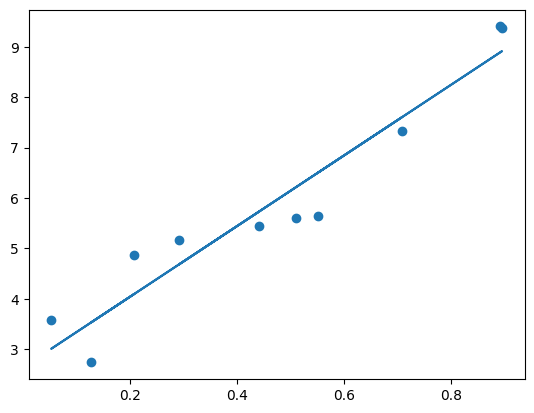

In [32]:
model = LinearRegression()
model.fit(X_train,Y_train)
pred = model.predict(X_train)
plt.scatter(X_train,Y_train)
plt.plot(X_train,pred)
MSE = mean_squared_error(Y_train,pred)
RMSE = math.sqrt(MSE)
print(' Train RMSE=',RMSE)
pred_test = model.predict(X_test)
MSE = mean_squared_error(Y_test,pred_test)
RMSE = math.sqrt(MSE)
print(' Test RMSE=', RMSE)


## Step 1 : Train the polynomial regression model with M = 1, 2, 5, 7, and 8 using the sklearn library. Note down the training and testing RMSEs and list them in the table. Write your observations. Also, obtain the plots of predictions for the training set and test them in each case.

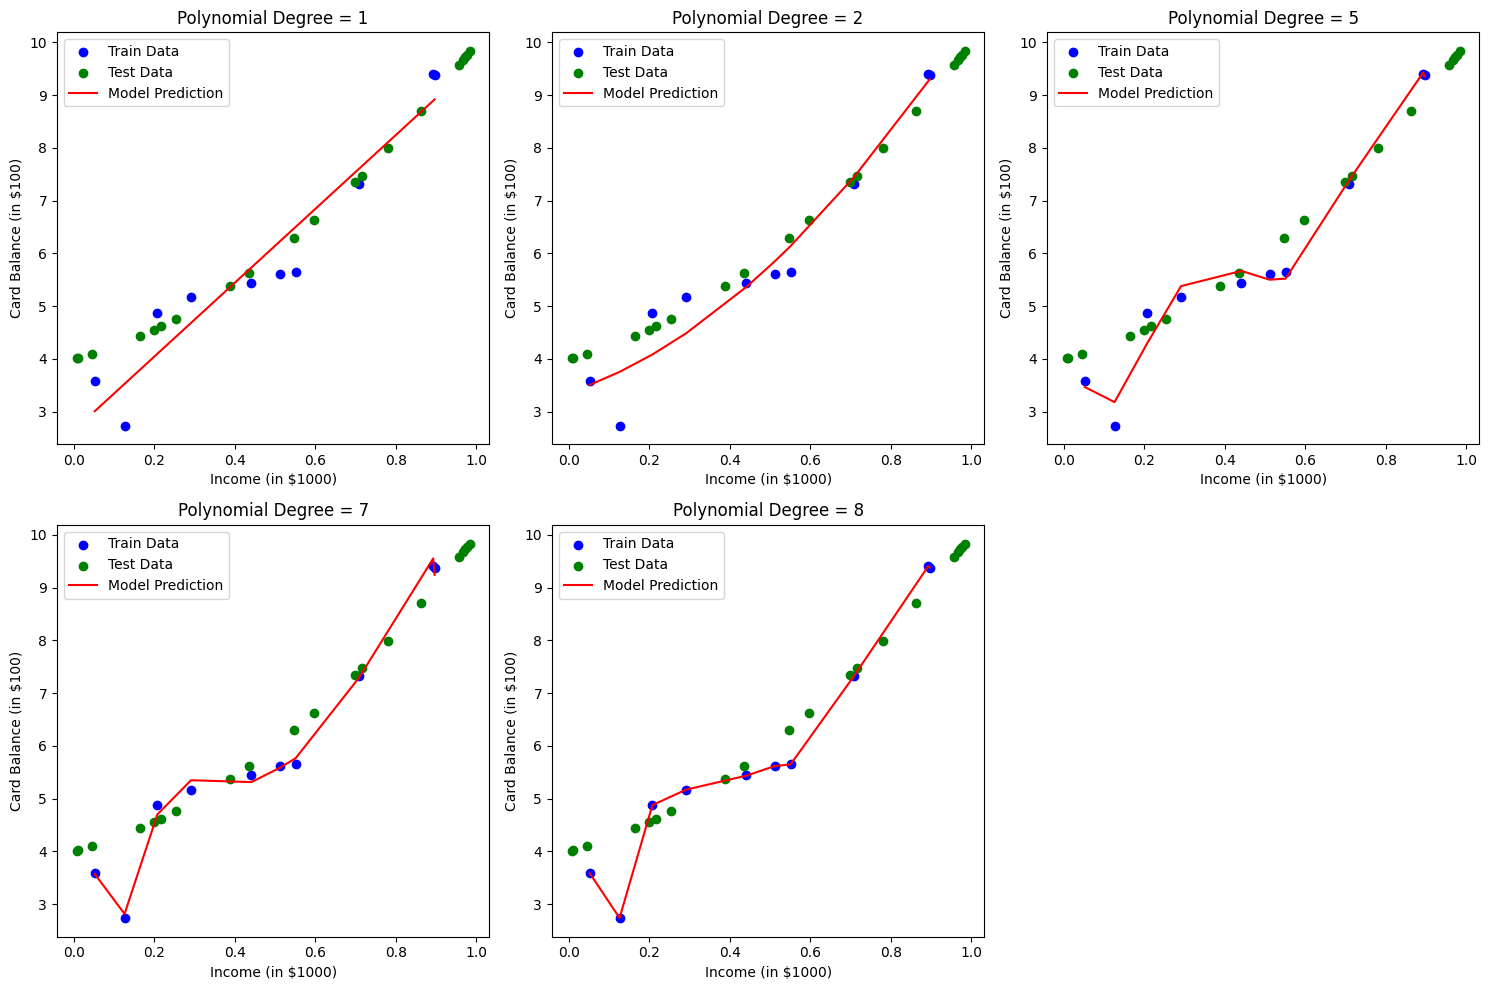

In [33]:
# Degrees to test
degrees = [1, 2, 5, 7, 8]

# Results storage
results = []

# Plot setup
plt.figure(figsize=(15, 10))

for i, degree in enumerate(degrees):
    # Transform features to polynomial terms
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, Y_train)

    # Predictions
    pred_train = model.predict(X_train_poly)
    pred_test = model.predict(X_test_poly)

    # Calculate RMSE
    train_mse = mean_squared_error(Y_train, pred_train)
    test_mse = mean_squared_error(Y_test, pred_test)
    train_rmse = math.sqrt(train_mse)
    test_rmse = math.sqrt(test_mse)

    # Store results
    results.append((degree, train_rmse, test_rmse))

    # Plot predictions
    plt.subplot(2, 3, i+1)
    plt.scatter(X_train, Y_train, color='blue', label='Train Data')
    plt.scatter(X_test, Y_test, color='green', label='Test Data')
    plt.plot(np.sort(X_train.ravel()),
             model.predict(poly.transform(np.sort(X_train, axis=0))),
             color='red', label='Model Prediction')
    plt.title(f'Polynomial Degree = {degree}')
    plt.xlabel('Income (in $1000)')
    plt.ylabel('Card Balance (in $100)')
    plt.legend(loc='best')

plt.tight_layout()
plt.show()



In [34]:
# Display results in a table
results_df = pd.DataFrame(results, columns=['Degree', 'Train RMSE', 'Test RMSE'])
print("RMSE Results:")
print(results_df)

RMSE Results:
   Degree  Train RMSE  Test RMSE
0       1    0.594715   0.562580
1       2    0.498058   0.411699
2       5    0.259377   2.577442
3       7    0.118690  11.569064
4       8    0.002625   4.077451


**OBSERVATIONS**

- As the degree of the polynomial increases, the training RMSE tends to decrease.
- For higher degrees, testing RMSE may increase, indicating overfitting.
- A balance is required to minimize both training and testing errors.
- Polynomial with degree 1 seem to be the case of underfitting because RMSE value of both train and test dataset is high.
- Polynomial with degree 2 seem to be the case of best fit  because RMSE value of both train and test dataset is least.
- Polynomial with degree 5 seem to be the case of overfitting because RMSE value of train dataset is very less as compared to test dataset.
- Polynomial with degree 7 seem to be the case of overfitting because RMSE value of train dataset is very less as compared to test dataset.
- Polynomial with degree 8 seem to be the case of overfitting because RMSE value of train dataset is very less as compared to test dataset.

## Step 2 : Train the regularized polynomial regression model with M =8 (also  alled ridge regression) using the regularization parameter λ = 0.25, and check the training and testing RMSEs. Also, obtain the plots of predictions for the training and test sets.

Ridge Regression Results (Polynomial Degree = 8, λ = 0.25):
Train RMSE: 0.5348
Test RMSE: 0.6155


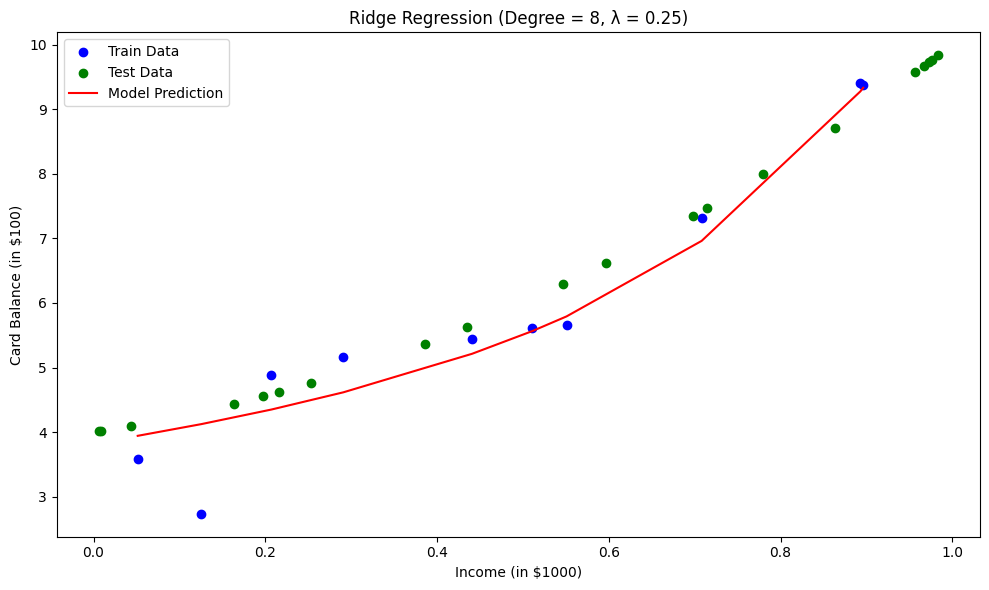

In [35]:
# Polynomial degree and regularization parameter
degree = 8
lambda_param = 0.25

# Transform features to polynomial terms
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the Ridge regression model
ridge_model = Ridge(alpha=lambda_param)
ridge_model.fit(X_train_poly, Y_train)

# Predictions
pred_train = ridge_model.predict(X_train_poly)
pred_test = ridge_model.predict(X_test_poly)

# Calculate RMSE
train_mse = mean_squared_error(Y_train, pred_train)
test_mse = mean_squared_error(Y_test, pred_test)
train_rmse = math.sqrt(train_mse)
test_rmse = math.sqrt(test_mse)

# Display RMSE results
print("Ridge Regression Results (Polynomial Degree = 8, \u03bb = 0.25):")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

# Plot predictions
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(X_train, Y_train, color='blue', label='Train Data')
# Scatter plot for testing data
plt.scatter(X_test, Y_test, color='green', label='Test Data')
# Plot model predictions
plt.plot(np.sort(X_train.ravel()),
         ridge_model.predict(poly.transform(np.sort(X_train, axis=0))),
         color='red', label='Model Prediction')

# Add labels and title
plt.title(f'Ridge Regression (Degree = {degree}, \u03bb = {lambda_param})')
plt.xlabel('Income (in $1000)')
plt.ylabel('Card Balance (in $100)')
plt.legend(loc='best')

# Show plot
plt.tight_layout()
plt.show()


**OBSERVATIONS**

Ridge regression with M=8 and λ=0.25 adds a penalty to large model coefficients, reducing overfitting and improving generalization. The regularization term ensures the model does not overly fit noise in the training data, especially for higher-order polynomials. While training error might increase slightly, the testing error decreases, indicating better performance on unseen data. The penalty effectively controls the contribution of higher-degree terms, maintaining a balance between model complexity and accuracy. Regularization mitigates the risk of overfitting while preserving the model's ability to capture meaningful patterns. Choosing λ=0.25 provides moderate regularization, ensuring a tradeoff between bias and variance.



## STEP 3 : The effect of the regularization parameter λ on the training RMSE and the flexibility of the obtained curve. For λ = 0, 0.25, 1, 1.5, 2, and 10, plot the estimated function on the train set, and test set.

λ = 0: Train RMSE = 0.0026, Test RMSE = 4.0775
λ = 0.25: Train RMSE = 0.5348, Test RMSE = 0.6155
λ = 1: Train RMSE = 0.6907, Test RMSE = 0.4917
λ = 1.5: Train RMSE = 0.7861, Test RMSE = 0.4643
λ = 2: Train RMSE = 0.8739, Test RMSE = 0.5022
λ = 10: Train RMSE = 1.5323, Test RMSE = 1.4248


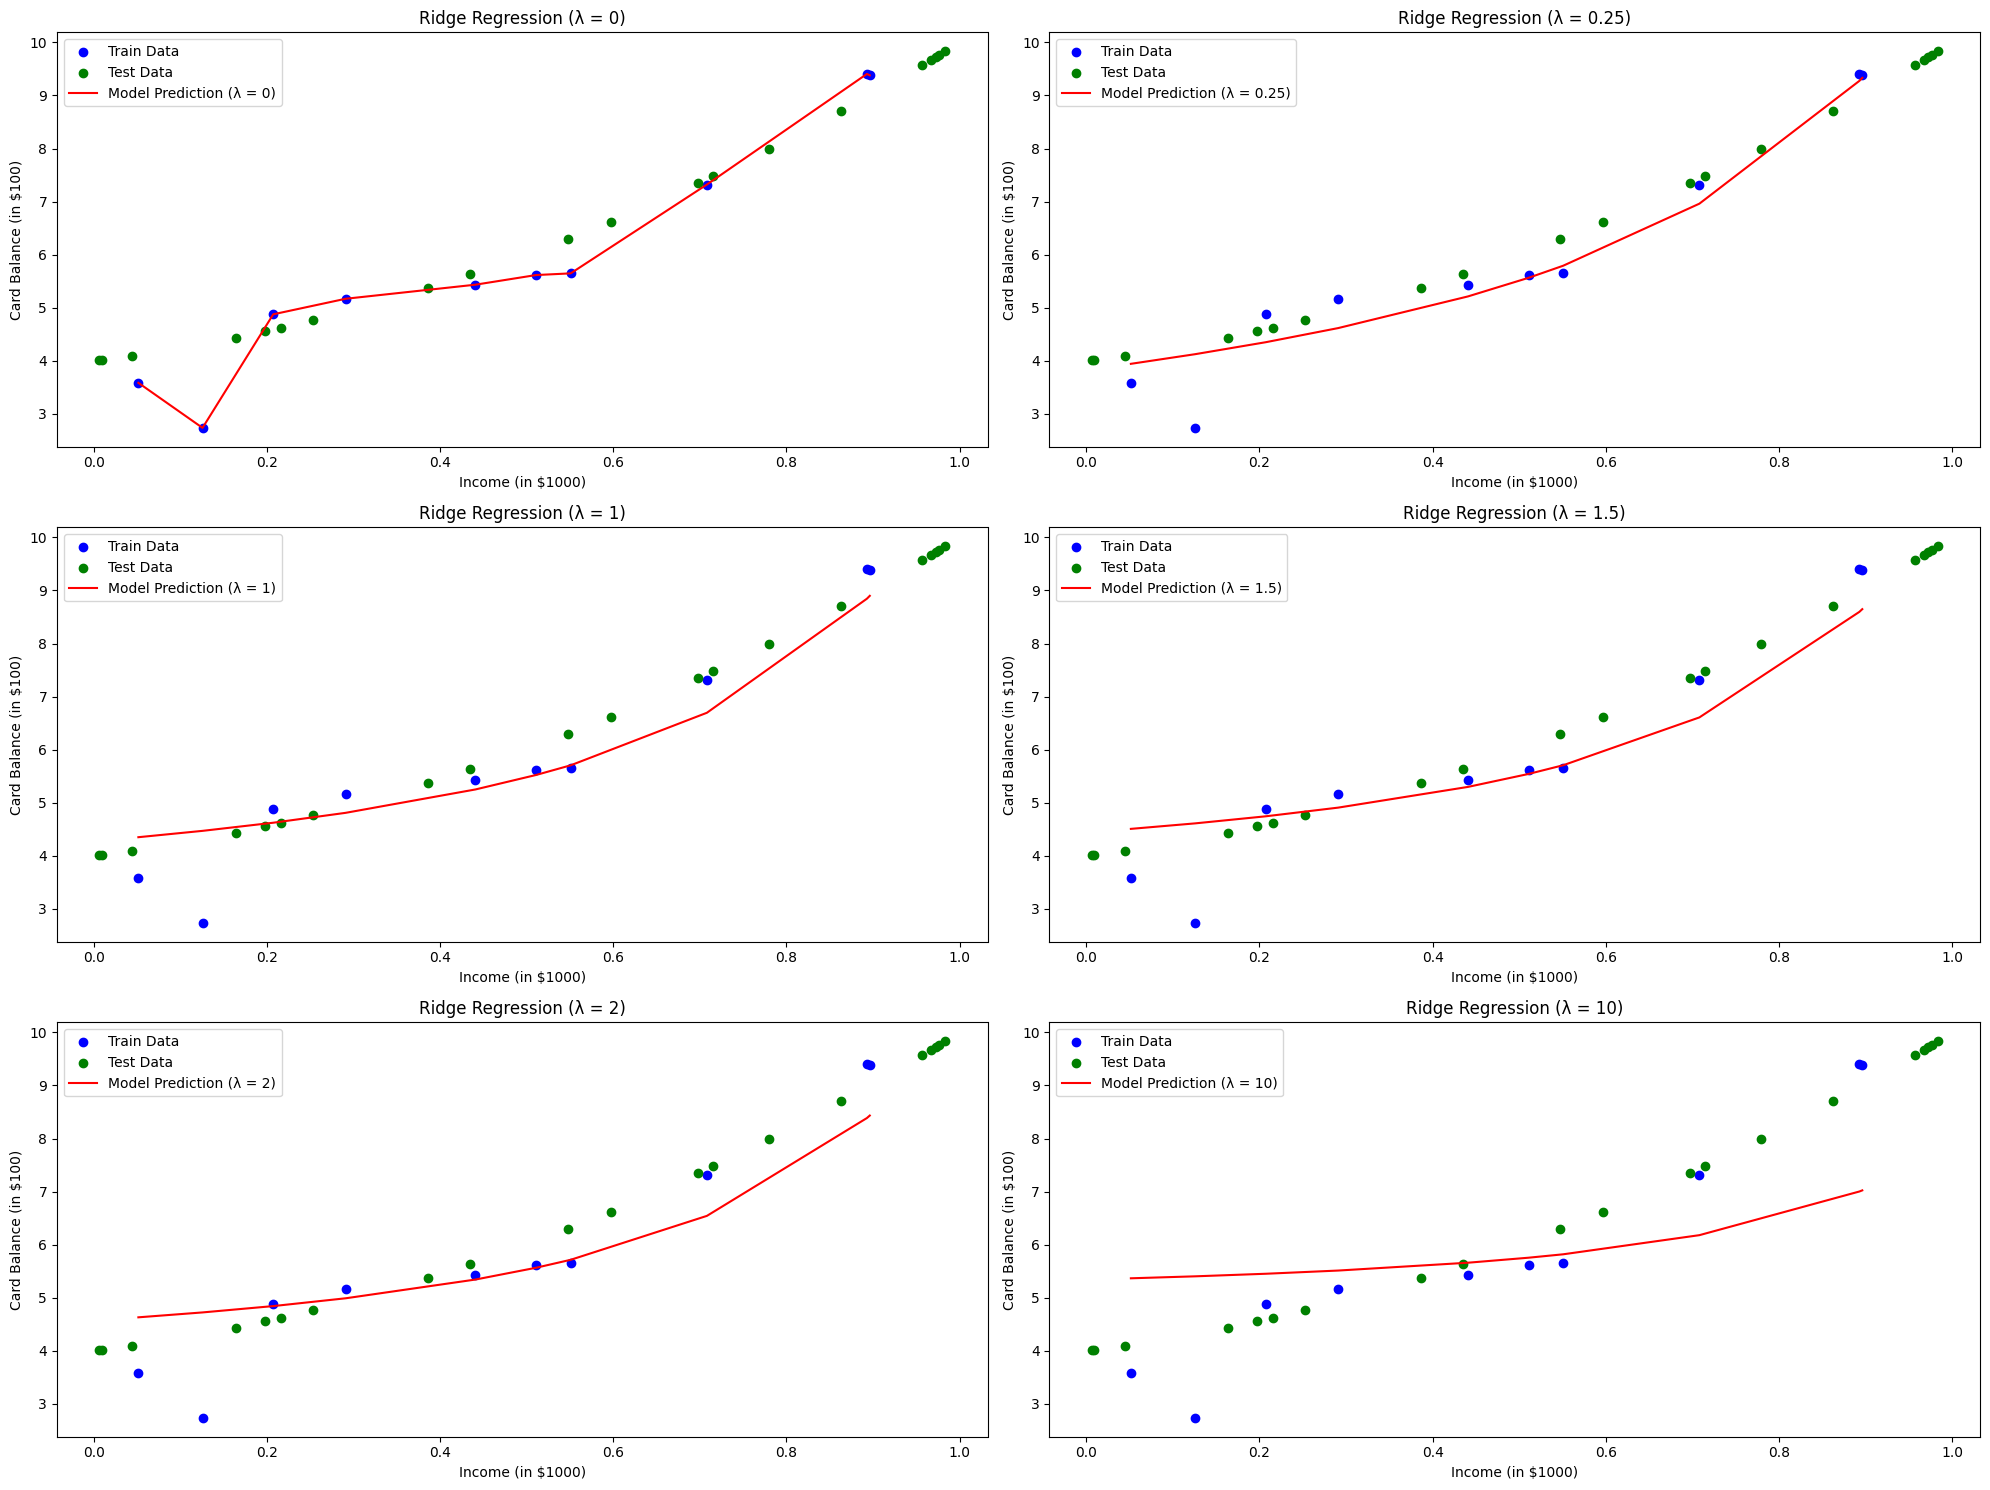

In [36]:
# Polynomial degree
degree = 8

# Regularization parameters to test
lambda_values = [0, 0.25, 1, 1.5, 2, 10]

# Plot setup
plt.figure(figsize=(20, 15))

for i, lambda_param in enumerate(lambda_values):
    # Transform features to polynomial terms
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train the Ridge regression model
    ridge_model = Ridge(alpha=lambda_param)
    ridge_model.fit(X_train_poly, Y_train)

    # Predictions
    pred_train = ridge_model.predict(X_train_poly)
    pred_test = ridge_model.predict(X_test_poly)

    # Calculate RMSE
    train_mse = mean_squared_error(Y_train, pred_train)
    test_mse = mean_squared_error(Y_test, pred_test)
    train_rmse = math.sqrt(train_mse)
    test_rmse = math.sqrt(test_mse)

    # Plot predictions
    plt.subplot(3, 2, i + 1)
    plt.scatter(X_train, Y_train, color='blue', label='Train Data')
    plt.scatter(X_test, Y_test, color='green', label='Test Data')
    plt.plot(np.sort(X_train.ravel()),
             ridge_model.predict(poly.transform(np.sort(X_train, axis=0))),
             color='red', label=f'Model Prediction (\u03bb = {lambda_param})')

    # Add title and labels
    plt.title(f'Ridge Regression (\u03bb = {lambda_param})')
    plt.xlabel('Income (in $1000)')
    plt.ylabel('Card Balance (in $100)')
    plt.legend(loc='best')

    # Print RMSE values
    print(f"\u03bb = {lambda_param}: Train RMSE = {train_rmse:.4f}, Test RMSE = {test_rmse:.4f}")

# Show plot
plt.tight_layout()
plt.show()


**OBSERVATIONS**

*   Flexibility Decreases with Higher λ: For λ=0, the model overfits and closely follows the training data.
As λ increases, the curve becomes smoother and less flexible, reflecting regularization.
*   Training RMSE Increases: Higher λ values penalize large coefficients, increasing the training error.
*   Testing RMSE Decreases Initially: Small λ values improve generalization by reducing overfitting.
Excessive regularization (λ=10) may lead to underfitting, increasing testing RMSE.
*   Tradeoff Between Overfitting and Underfitting: Moderate λ values (e.g.,
 λ=0.25,1) provide a good balance, minimizing testing RMSE.



